## Training and testing CNN models

### Single-Model CNN training

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
train = get_data('spectrogram/train')
val = get_data('spectrogram/test')

In [4]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [5]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [6]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [7]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [8]:
EPOCH=500

In [9]:
history = model.fit(x_train,y_train,epochs = EPOCH, validation_data = (x_val, y_val))

Epoch 1/500


C:\Users\bhvsh\anaconda3\envs\cuda\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 22s 424ms/step - loss: 2.3453 - accuracy: 0.1100 - val_loss: 2.2851 - val_accuracy: 0.1200
Epoch 2/500
19/19 [==============================] - 2s 111ms/step - loss: 2.1903 - accuracy: 0.1883 - val_loss: 2.1595 - val_accuracy: 0.2550
Epoch 3/500
19/19 [==============================] - 2s 110ms/step - loss: 2.0182 - accuracy: 0.2767 - val_loss: 2.0375 - val_accuracy: 0.2875
Epoch 4/500
19/19 [==============================] - 2s 110ms/step - loss: 1.8536 - accuracy: 0.3217 - val_loss: 1.9472 - val_accuracy: 0.2900
Epoch 5/500
19/19 [==============================] - 2s 110ms/step - loss: 1.7725 - accuracy: 0.3367 - val_loss: 1.9957 - val_accuracy: 0.3200
Epoch 6/500
19/19 [==============================] - 2s 111ms/step - loss: 1.7070 - accuracy: 0.3483 - val_loss: 1.9264 - val_accuracy: 0.2750
Epoch 7/500
19/19 [==============================] - 2s 110ms/step - loss: 1.6655 - accuracy: 0.3633 - val_loss: 1.8943 - val_accuracy: 0.3250
Epoch 8/50

In [10]:
import pickle
model.save_weights('%d_epoch_simple_lr.cpkt'%EPOCH)

pickle.dump(history.history, open('history_%d_epoch_simple.pkl'%EPOCH,'wb'))

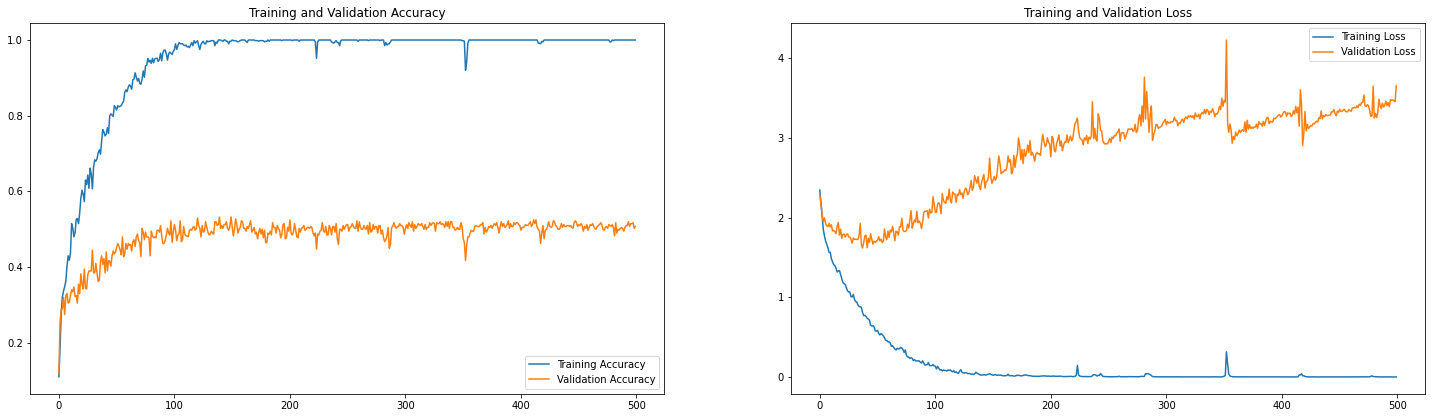

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCH)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

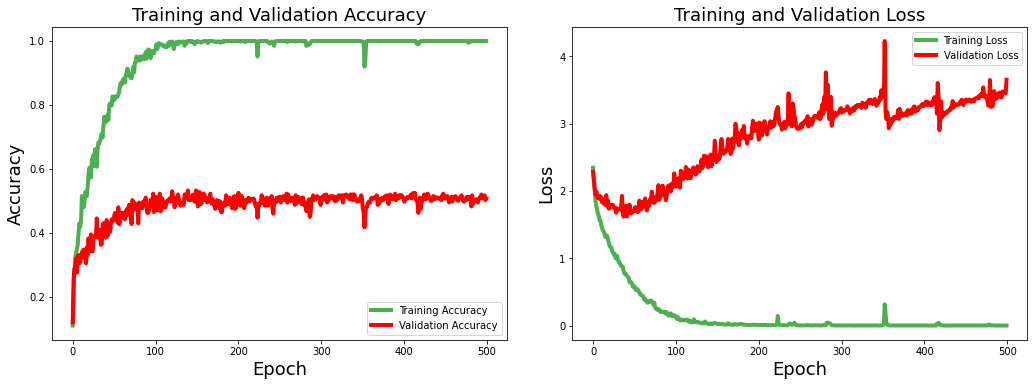

<Figure size 432x288 with 0 Axes>

In [12]:
import pickle
history = pickle.load(open('history_%d_epoch_simple.pkl'%EPOCH,'rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(EPOCH)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()

In [13]:
predictions = np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.40      0.62      0.49        40
   classical       0.94      0.78      0.85        40
     country       0.55      0.45      0.49        40
       disco       0.41      0.53      0.46        40
      hiphop       0.39      0.60      0.48        40
        jazz       0.47      0.42      0.45        40
       metal       0.86      0.60      0.71        40
         pop       0.76      0.55      0.64        40
      reggae       0.33      0.33      0.33        40
        rock       0.30      0.20      0.24        40

    accuracy                           0.51       400
   macro avg       0.54      0.51      0.51       400
weighted avg       0.54      0.51      0.51       400



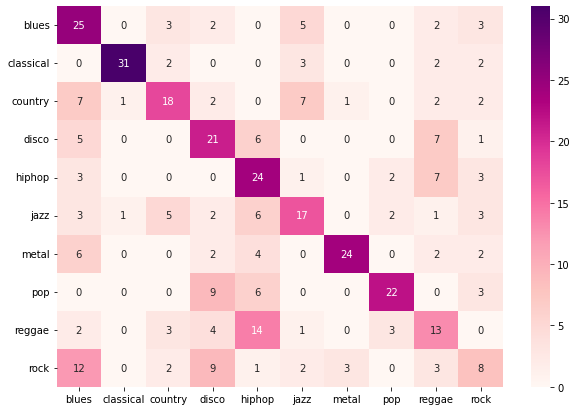

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png',bbox_inches = 'tight')

### Transfer Learning based modeling

In [15]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")

In [16]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")                                     
                                ])

In [17]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = EPOCH , validation_data = (x_val, y_val))

C:\Users\bhvsh\anaconda3\envs\cuda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500


C:\Users\bhvsh\anaconda3\envs\cuda\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 10s 315ms/step - loss: 2.5826 - accuracy: 0.1033 - val_loss: 2.3880 - val_accuracy: 0.1300
Epoch 2/500
19/19 [==============================] - 3s 183ms/step - loss: 2.4210 - accuracy: 0.1250 - val_loss: 2.2831 - val_accuracy: 0.1850
Epoch 3/500
19/19 [==============================] - 3s 182ms/step - loss: 2.3077 - accuracy: 0.1583 - val_loss: 2.2204 - val_accuracy: 0.2300
Epoch 4/500
19/19 [==============================] - 3s 182ms/step - loss: 2.2208 - accuracy: 0.1800 - val_loss: 2.1715 - val_accuracy: 0.2525
Epoch 5/500
19/19 [==============================] - 3s 182ms/step - loss: 2.1623 - accuracy: 0.2017 - val_loss: 2.1289 - val_accuracy: 0.2725
Epoch 6/500
19/19 [==============================] - 3s 183ms/step - loss: 2.0817 - accuracy: 0.2583 - val_loss: 2.0906 - val_accuracy: 0.2850
Epoch 7/500
19/19 [==============================] - 3s 181ms/step - loss: 2.0810 - accuracy: 0.2633 - val_loss: 2.0568 - val_accuracy: 0.2950
Epoch 8/50

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


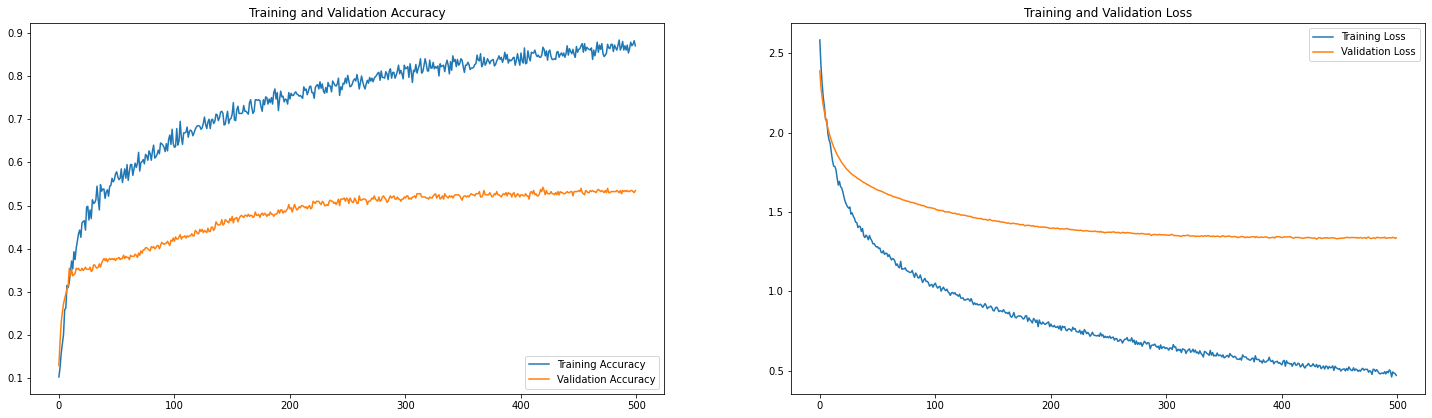

In [19]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(EPOCH)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

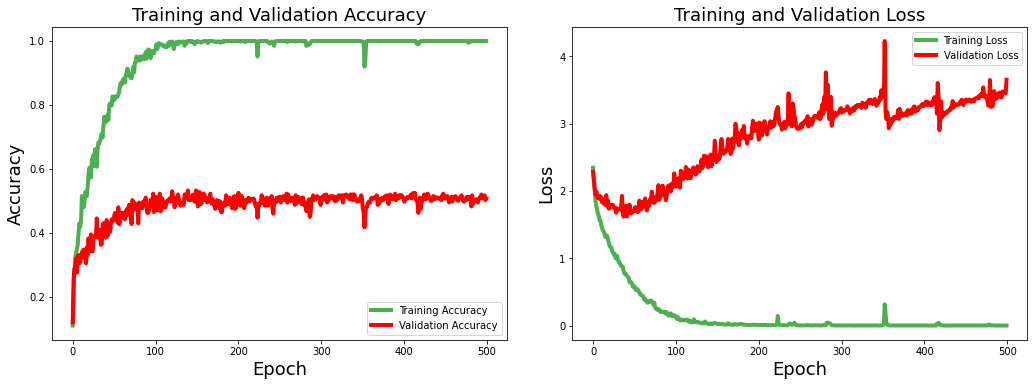

<Figure size 432x288 with 0 Axes>

In [20]:
import pickle
history = pickle.load(open('history_%d_epoch_simple.pkl'%EPOCH,'rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(EPOCH)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()
plt.savefig('tfr_plot1.png',bbox_inches = 'tight')
plt.clf()

In [21]:
np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.40      0.62      0.49        40
   classical       0.94      0.78      0.85        40
     country       0.55      0.45      0.49        40
       disco       0.41      0.53      0.46        40
      hiphop       0.39      0.60      0.48        40
        jazz       0.47      0.42      0.45        40
       metal       0.86      0.60      0.71        40
         pop       0.76      0.55      0.64        40
      reggae       0.33      0.33      0.33        40
        rock       0.30      0.20      0.24        40

    accuracy                           0.51       400
   macro avg       0.54      0.51      0.51       400
weighted avg       0.54      0.51      0.51       400



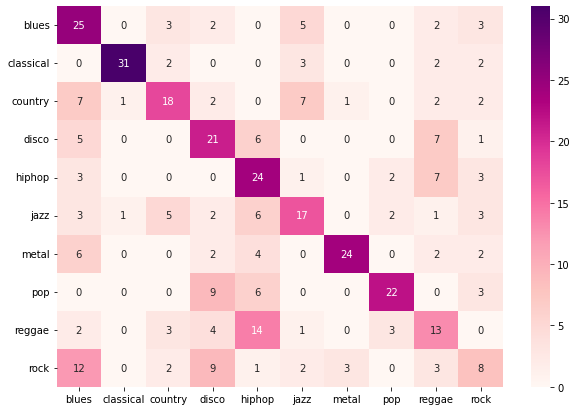

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

In [23]:
model.save_weights('%d_epoch_transfer_lr.cpkt'%EPOCH)
pickle.dump(history1.history, open('history_%d_epoch_tr.pkl'%EPOCH,'wb'))


# Evaluating the results of tested training models

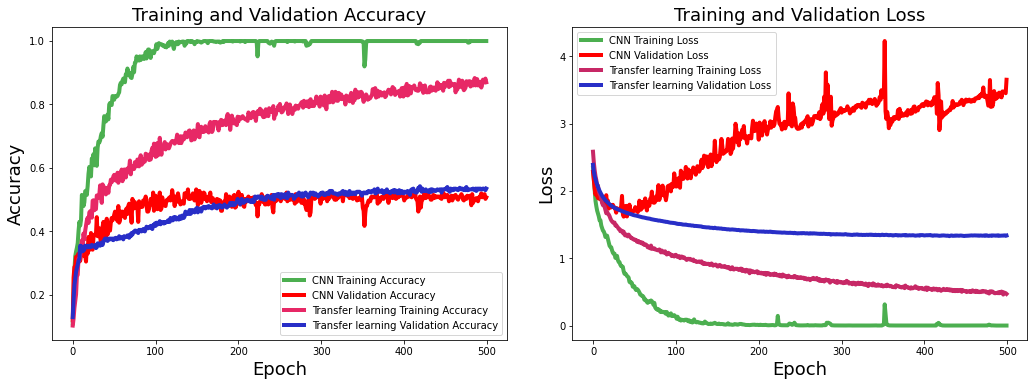

<Figure size 432x288 with 0 Axes>

In [4]:
epochs_range = range(EPOCH)
import matplotlib.pyplot as plt
import pickle 
history = pickle.load(open('history_%d_epoch_simple.pkl'%EPOCH,'rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

history = pickle.load(open('history_%d_epoch_tr.pkl'%EPOCH,'rb'))
acc1 = history['accuracy']
val_acc1 = history['val_accuracy']
loss1 = history['loss']
val_loss1 = history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()
plt.savefig('all_1.png',bbox_inches = 'tight')
plt.clf()

# Clearing the GPU memory

In [1]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()